# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

We didn't want to use it in the lectures, but believe that it would be very interesting for you to try it out (and maybe read about it on your own).

There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.

***

Plot the data with 2, 3 and 5 clusters. What do you think that means?

Finally, import the CSV with the correct answers (iris_with_answers.csv) and check if the clustering worked as expected. Note that this is not how we usually go about clustering problems. If we have the answers prior to that, we would go for classification (e.g. a logistic regression).

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [3]:
data = pd.read_csv('data/iris-dataset.csv')
data.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

Text(0, 0.5, 'width')

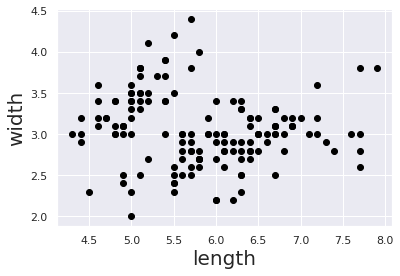

In [4]:
plt.scatter(data['sepal_length'],data['sepal_width'],c='black')
plt.xlabel('length', fontsize=20)
plt.ylabel('width', fontsize=20)

# Clustering (unscaled data)

Separate the original data into 2 clusters.

In [5]:
n_clust = 2
kmeans = KMeans(n_clust)

In [6]:
use_data = data.copy()
kmeans.fit(use_data)

KMeans(n_clusters=2)

Text(0, 0.5, 'width')

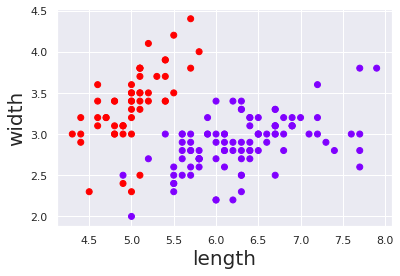

In [7]:
results1 = use_data.copy()
results1['cluster'] = kmeans.fit_predict(use_data)

plt.scatter(use_data['sepal_length'], use_data['sepal_width'], 
            c=results1['cluster'], cmap='rainbow')
plt.xlabel('length', fontsize=20)
plt.ylabel('width', fontsize=20)

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. 

In [8]:
from sklearn import preprocessing as pp

data_scaled = pp.scale(use_data)
data_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Clustering (scaled data)

In [9]:
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [10]:
results_sc = data.copy()
results_sc['cluster'] = kmeans.fit_predict(data_scaled)
results_sc

sepal_length  sepal_width  petal_length  petal_width  cluster
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        0
146           6.3          2.5           5.0          1.9        0
147           6.5          3.0           5.2          2.0        0
148           6.2          3.4           5.4          2.3        0
149           5.9          3.0           5.1          1.8        0

[150 rows x 5 columns]

Text(0, 0.5, 'width')

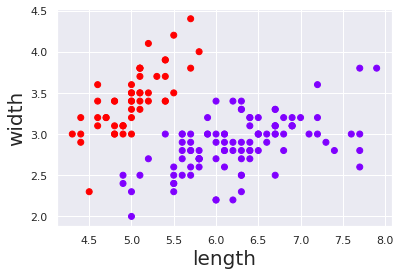

In [11]:
results1 = use_data.copy()
results1['cluster'] = kmeans.fit_predict(use_data)

plt.scatter(use_data['sepal_length'], use_data['sepal_width'], 
            c=results_sc['cluster'], cmap='rainbow')
plt.xlabel('length', fontsize=20)
plt.ylabel('width', fontsize=20)

The two solutions are identical since the original features had very similar scales to start with.

## Take Advantage of the Elbow Method

### WCSS

In [12]:
wcss = []
for i in range(1, 10):
    kmeans_i = KMeans(i)
    kmeans_i.fit(data_scaled)
    wcss.append(kmeans_i.inertia_)
wcss

[600.0000000000003,
 223.73200573676343,
 141.1414599803658,
 114.61550694959811,
 91.06677122728537,
 81.93661238016381,
 71.7916034109442,
 62.882173273612494,
 54.25495695793489]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

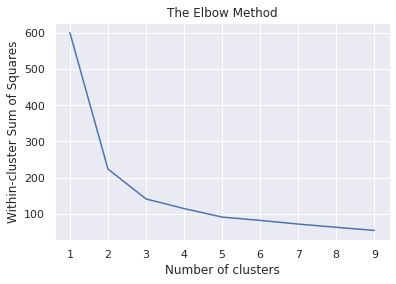

In [13]:
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

## Understanding the Elbow Curve

Construct and compare the scatter plots to determine which number of clusters is appropriate for further use in our analysis. Based on the Elbow Curve, 2, 3 or 5 seem the most likely.

## 2 clusters

Start by separating the standardized data into 2 clusters (you've already done that!)

In [14]:
n_clust = 2
kmeans2 = KMeans(n_clust)
results2 = use_data.copy()
results2['cluster'] = kmeans2.fit_predict(data_scaled)

Construct a scatter plot of the original data using the standardized clusters

Text(0, 0.5, 'width')

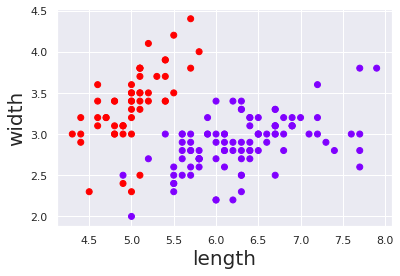

In [15]:
plt.scatter(use_data['sepal_length'], use_data['sepal_width'], 
            c=results2['cluster'], cmap='rainbow')
plt.xlabel('length', fontsize=20)
plt.ylabel('width', fontsize=20)

## 3 clusters
Redo the same for 3 and 5 clusters

In [16]:
n_clust = 3
kmeans3 = KMeans(n_clust)
results3 = use_data.copy()
results3['cluster'] = kmeans3.fit_predict(data_scaled)

Text(0, 0.5, 'width')

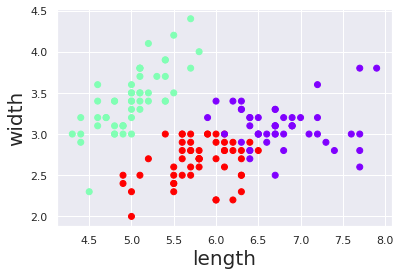

In [17]:
plt.scatter(use_data['sepal_length'], use_data['sepal_width'], 
            c=results3['cluster'], cmap='rainbow')
plt.xlabel('length', fontsize=20)
plt.ylabel('width', fontsize=20)

## 5 clusters

In [18]:
n_clust = 5
kmeans5 = KMeans(n_clust)
results5 = use_data.copy()
results5['cluster'] = kmeans5.fit_predict(data_scaled)

Text(0, 0.5, 'width')

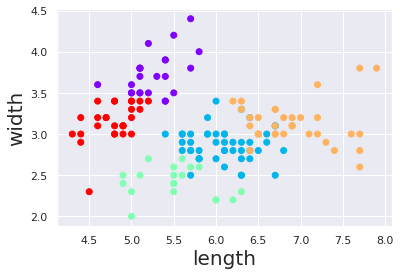

In [19]:
plt.scatter(use_data['sepal_length'], use_data['sepal_width'], 
            c=results5['cluster'], cmap='rainbow')
plt.xlabel('length', fontsize=20)
plt.ylabel('width', fontsize=20)

## Compare your solutions to the original iris dataset

The original (full) iris data is located in <i>iris_with_answers.csv</i>. Load the csv, plot the data and compare it with your solution. 

Obviously there are only 3 types, because that's the original (truthful) iris dataset.

The 2-cluster solution seemed good, but in real life the iris dataset has 3 SPECIES (a 3-cluster solution). Therefore, clustering cannot be trusted at all times. Sometimes it seems like x clusters are a good solution, but in real life, there are more (or less).

In [20]:
true_data = pd.read_csv('data/iris-with-answers.csv')
true_data.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [22]:
species = true_data['species'].unique()
n_spec = len(species)
map_dict = {species:num for (species,num) in zip(species,range(n_spec))}
true_data['species'] = true_data['species'].map(map_dict)
true_data

sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]

Text(0, 0.5, 'width')

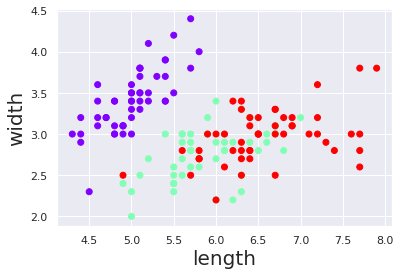

In [23]:
plt.scatter(true_data['sepal_length'], true_data['sepal_width'],
           c=true_data['species'], cmap='rainbow')
plt.xlabel('length', fontsize=20)
plt.ylabel('width', fontsize=20)

Text(0, 0.5, 'width')

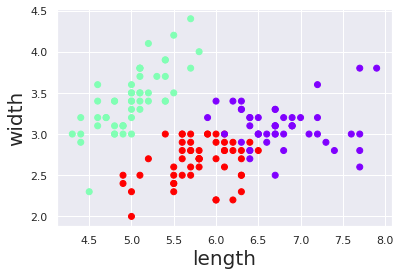

In [24]:
# Compared to our 3 cluster...
plt.scatter(use_data['sepal_length'], use_data['sepal_width'], 
            c=results3['cluster'], cmap='rainbow')
plt.xlabel('length', fontsize=20)
plt.ylabel('width', fontsize=20)

Examining the other scatter plot (petal length vs petal width), we see that in fact the features which actually make the species different are petals and NOT sepals!

Note that 'real data' is the data observed in the real world (biological data)

This shows us that:
<li> the Elbow method is imperfect (we might have opted for 2 or even 4) </li>
<li> k-means is very useful in moments where we already know the number of clusters - in this case: 3 </li>